In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
%matplotlib notebook

# Paraliste:
timesteps = 1500
dim = 3
dens = 1
rc = 20
birthrate = 0.5
deathrate = 0.02

# Ausgabe aller Indizes
ausgabe = False
saving = False
id = 711
saving_data = False
saving_entropies = False
saving_plots = False


In [2]:
# Durchlauf
lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim, r_b = birthrate, variation = False, restchannels = rc ,r_d = deathrate)
lgca.timeevo_until_hom(record=True)



standard deviation set to =  0.1
Progress: [####################] 100% Done...


DATEN SPEICHERN:

In [12]:
if saving_data:
    np.save('saved_data/' + 'props_t id=' + str(id), lgca.props_t)
    np.savez('saved_data/' + 'Parameter id=' + str(id), density = lgca.density, restchannels = lgca.restchannels,\
             velocitychannels=lgca.l, kappa=lgca.K, rb=lgca.r_b, rd=lgca.r_d, m=lgca.r_int)
if saving_entropies:
    np.savez('saved_data/' + 'Entropies id=' + str(id), \
             shan=entropies(lgca.props_t,1), simpson=entropies(lgca.props_t,1.5), gini=entropies(lgca.props_t,2))
id = 2729
np.save('saved_data/' + 'props_t id=' + str(id), lgca.props_t)
np.savez('saved_data/' + 'Parameter id=' + str(id), density = lgca.density, restchannels = lgca.restchannels,\
             velocitychannels=lgca.l, kappa=lgca.K, rb=lgca.r_b, rd=lgca.r_d, m=lgca.r_int)



LADEN DER DATEN:

In [4]:
# parasammlung = np.load('saved_data/' + 'Parameter id=0'+'.npz')

# print(parasammlung.files)
# print(parasammlung['density'])
# print(parasammlung['restchannels'])
# print(parasammlung['velocitychannels'])
# print(parasammlung['kappa'])
# print(parasammlung['m'])

# propst = np.load('saved_data/' + 'props_t id=0' +'.npy')
# print(propst)

# entropies = np.load('saved_data/' + 'Entropies id=0'+'.npz')
# sh, si, gi = entropies
# print(entropies[sh], entropies[si], entropies[gi])

PLOTS:

erste Schleife fertig, nun plotbar
bin schon bei c=  0
bin schon bei c=  1
bin schon bei c=  2
bin schon bei c=  3
bin schon bei c=  4
bin schon bei c=  5
bin schon bei c=  6
bin schon bei c=  7
bin schon bei c=  8
bin schon bei c=  9
bin schon bei c=  10
bin schon bei c=  11
bin schon bei c=  12
bin schon bei c=  13
bin schon bei c=  14
bin schon bei c=  15
bin schon bei c=  16
bin schon bei c=  17
bin schon bei c=  18
bin schon bei c=  19
bin schon bei c=  20
bin schon bei c=  21
bin schon bei c=  22
bin schon bei c=  23
bin schon bei c=  24
bin schon bei c=  25
bin schon bei c=  26
bin schon bei c=  27
bin schon bei c=  28
bin schon bei c=  29
bin schon bei c=  30
bin schon bei c=  31
bin schon bei c=  32
bin schon bei c=  33
bin schon bei c=  34
bin schon bei c=  35
bin schon bei c=  36
bin schon bei c=  37
bin schon bei c=  38
bin schon bei c=  39
bin schon bei c=  40
bin schon bei c=  41
bin schon bei c=  42
bin schon bei c=  43
bin schon bei c=  44
bin schon bei c=  45
bin schon

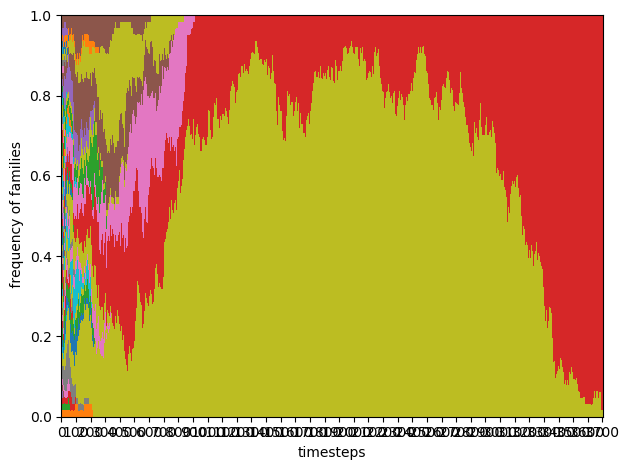

In [5]:
lgca.bar_stacked_relative()


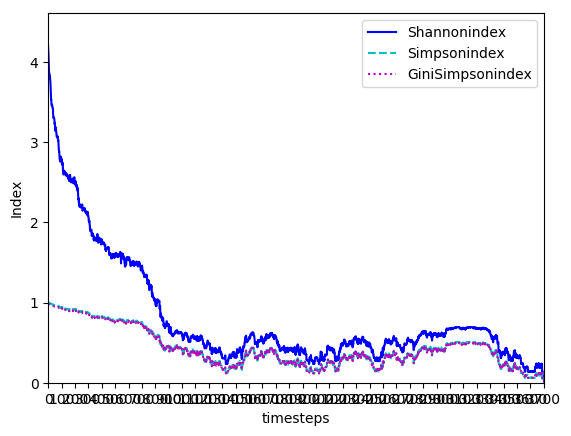

In [6]:
plot_entropies_together(lgca.props_t, id=id, save=saving_plots)


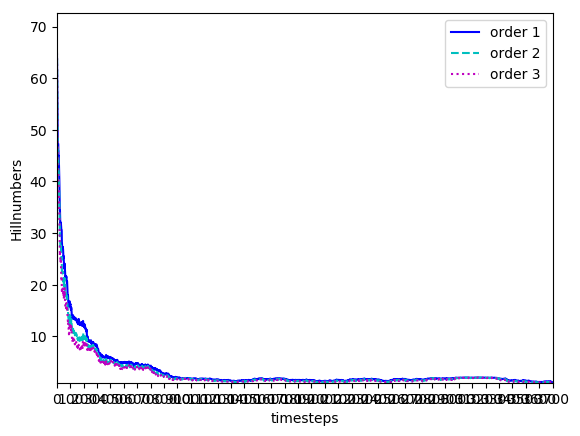

In [7]:
plot_hill_together(lgca.props_t, id=id, save=saving_plots)


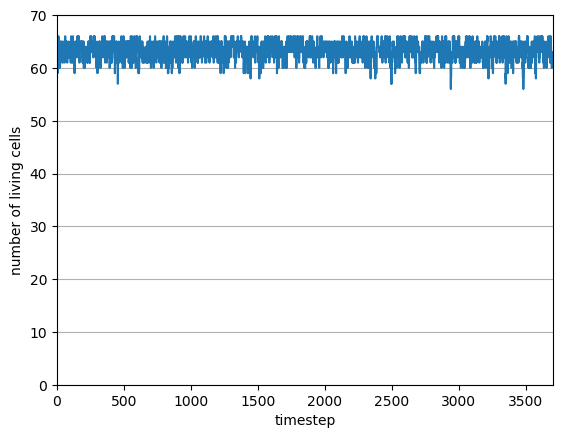

In [8]:
plot_popsize(lgca.props_t, save=saving, id=id)

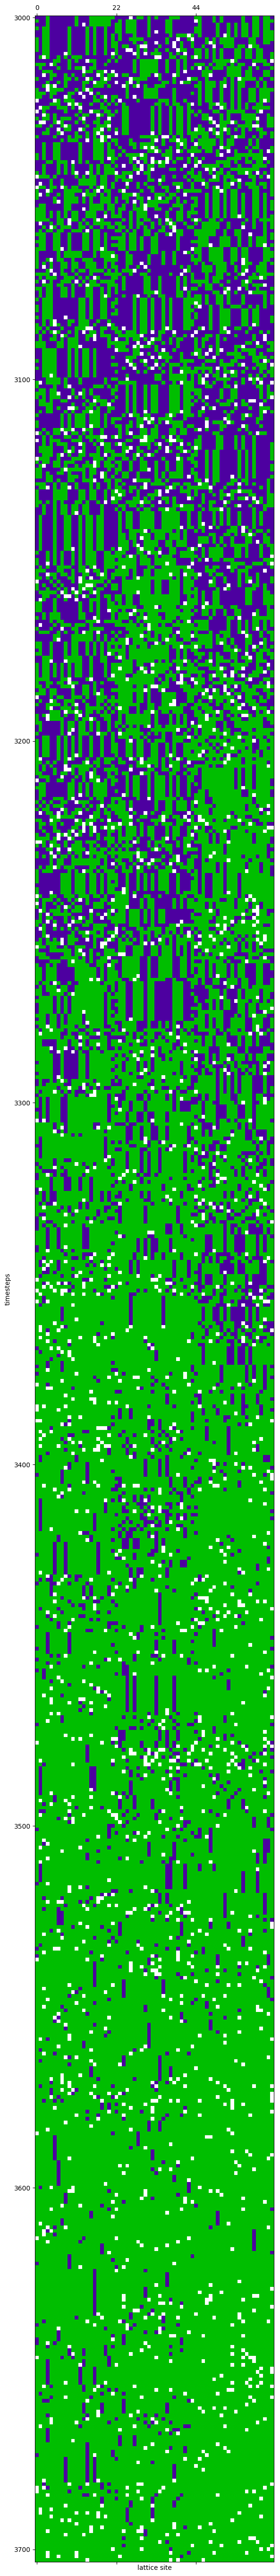

In [11]:
lgca.spatial_plot(tbeg=3000, figsize=(20,70))